# 7.Data Visualization with Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1)

print ('Data read into a pandas dataframe!')
df_can.head(3)

Data read into a pandas dataframe!


,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,18433
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Area Plots](#0)<br>
2. [Histograms](#2)<br>
3. [Bar Charts](#4)<br>
4. [Pie Charts](#6)<br>
2. [Box Plots](#8)<br>
2. [Scatter Plots](#10)<br>
2. [Bubble Plots](#12)<br>
2. [Waffle Charts](#14)<br>
2. [Word Clouds](#16)<br>
2. [Seaborn and Regression Plots](#18)<br>
2. [Geospatial Data](#20)<br>


</div>
<hr>

# Area Plots <a id="0"></a>
* Commonly used to represent cumulated totals using numbers or percentages over time.
* Is based on the line plot and can be stack or unstack

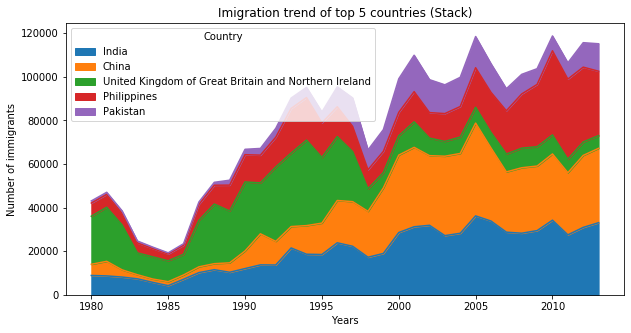

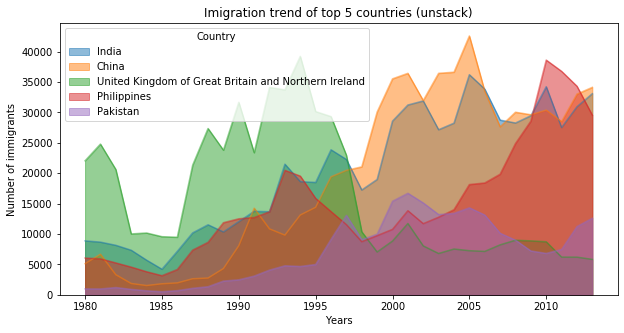

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972


In [4]:
#Add a Total collumn with the sum of all years and sort the countries based on it, set Country as the index
#and set all collumns names as strings
df_AreaP = df_can.sort_values(['Total'], ascending = False, axis = 0)
df_AreaP.set_index('Country', inplace=True)
df_AreaP.columns = list(map(str, df_AreaP.columns))

#A list with the range f years
years = list(map(str,range(1980, 2014)))

#save only to plot the Top5 countries with most migration
df_AreaP = df_AreaP.head()
df_AreaP = df_AreaP[years].transpose()

#Plot the data
df_AreaP.plot(kind  = 'area', alpha = 1, figsize=(10,5))
plt.title('Imigration trend of top 5 countries (Stack)')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

df_AreaP.plot(kind  = 'area', stacked = False, alpha = .5, figsize=(10,5))
plt.title('Imigration trend of top 5 countries (unstack)')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

df_AreaP.head(2)

# Histograms <a id="2"></a>
* A histogram is a way of representing the frequency distribution of a variable.

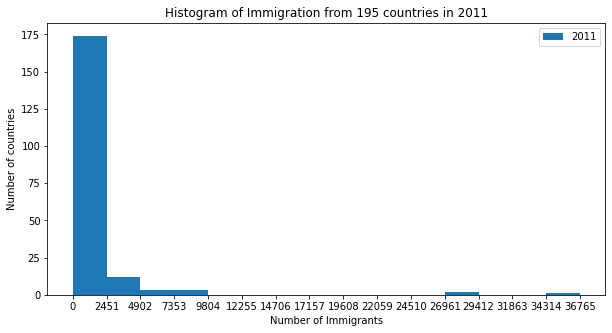

,2011
Country,
India,27509
China,28502


In [5]:
#Add a Total collumn with the sum of all years and sort the countries based on it, set Country as the index
#and set all collumns names as strings
df_Hist = df_can.sort_values(['Total'], ascending = False, axis = 0)
df_Hist.set_index('Country', inplace=True)
df_Hist.columns = list(map(str, df_Hist.columns))

year = '2011'

#Plot the data
count, bin_edges = np.histogram(df_Hist[year], 15)

plt.rcParams['figure.figsize'] = [10, 5]
df_Hist[[year]].plot(kind  = 'hist', xticks =bin_edges, bins = 15)
plt.title('Histogram of Immigration from 195 countries in ' + year)
plt.ylabel('Number of countries')
plt.xlabel('Number of Immigrants')

plt.show()
df_Hist[[year]].head(2)

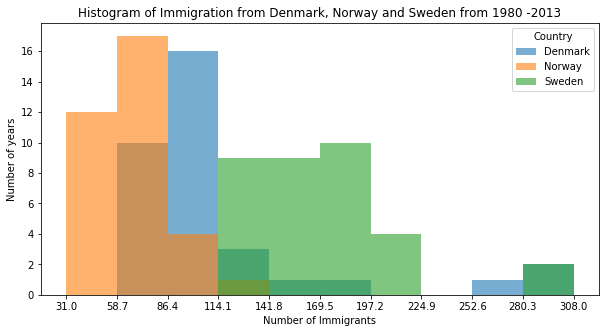

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308


In [6]:
#Add a Total collumn with the sum of all years and sort the countries based on it, set Country as the index
#and set all collumns names as strings
df_Hist = df_can.sort_values(['Total'], ascending = False, axis = 0)
df_Hist.set_index('Country', inplace=True)
df_Hist.columns = list(map(str, df_Hist.columns))

years = list(map(str,range(1980, 2014)))

df_Hist = df_Hist.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

#Plot the data
count, bin_edges = np.histogram(df_Hist, bins = 10)
df_Hist.plot(kind  = 'hist',
                     figsize = (10, 5),
                     xticks = bin_edges,
                     bins = 10,
                     alpha = 0.6)
plt.title('Histogram of Immigration from Denmark, Norway and Sweden from 1980 -2013')
plt.ylabel('Number of years')
plt.xlabel('Number of Immigrants')

plt.show()
df_Hist.head(2)


# Bar Charts <a id="4"></a>
* Unlike a histogram, a bar chart is commonly used to compare the values of a variable at a given point in time
* Or the the values of the same variable for different records

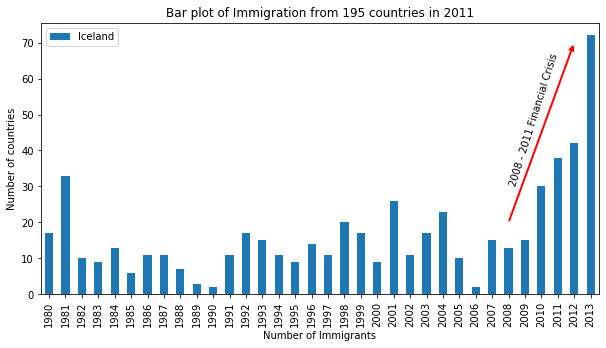

,Iceland
1980,17
1981,33


In [7]:
#Add a Total collumn with the sum of all years and sort the countries based on it, set Country as the index
#and set all collumns names as strings
df_BarC = df_can.sort_values(['Total'], ascending = False, axis = 0)
df_BarC.set_index('Country', inplace=True)
df_BarC.columns = list(map(str, df_BarC.columns))

years = list(map(str, range(1980,2014)))
df_BarC = df_BarC.loc['Iceland', years].to_frame()
df_BarC.head(2)

#Plot the data
plt.rcParams['figure.figsize'] = [10, 5]
df_BarC.plot(kind  = 'bar')
plt.title('Bar plot of Immigration from 195 countries in ' + year)
plt.ylabel('Number of countries')
plt.xlabel('Number of Immigrants')

plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )


plt.show()
df_BarC.head(2)


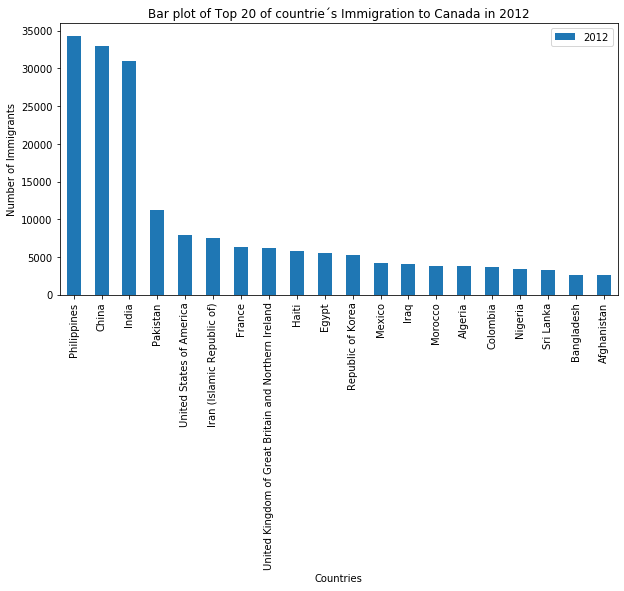

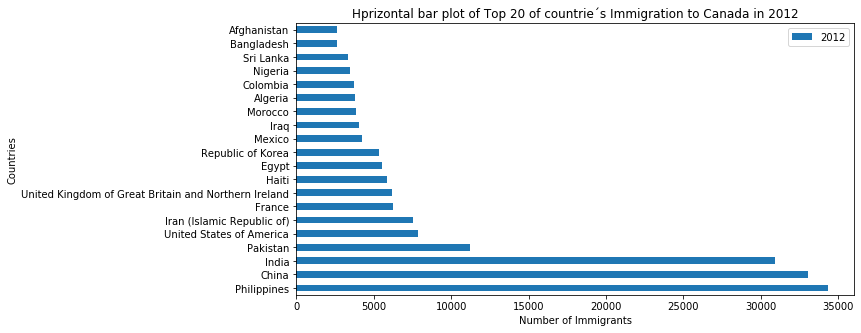

,2012
Country,
Philippines,34315
China,33024


In [8]:
#Add a Total collumn with the sum of all years and sort the countries based on it, set Country as the index
#and set all collumns names as strings
year = '2012'
TopX = 20
df_BarC = df_can.sort_values([int(year)], ascending = False, axis = 0)
df_BarC.set_index('Country', inplace=True)
df_BarC.columns = list(map(str, df_BarC.columns))
df_BarC = df_BarC[[year]].head(TopX)

#Plot the data
plt.rcParams['figure.figsize'] = [10, 5]
df_BarC.plot(kind  = 'bar')
plt.title('Bar plot of Top ' + str(TopX) + ' of countrie´s Immigration to Canada in ' + year)
plt.ylabel('Number of Immigrants')
plt.xlabel('Countries')
plt.show()

plt.rcParams['figure.figsize'] = [10, 5]
df_BarC.plot(kind  = 'barh')
plt.title('Hprizontal bar plot of Top ' + str(TopX) + ' of countrie´s Immigration to Canada in ' + year)
plt.xlabel('Number of Immigrants')
plt.ylabel('Countries')
plt.show()

df_BarC.head(2)


# Pie Charts <a id="6"></a>
* Unlike a histogram, a bar chart is commonly used to compare the values of a variable at a given point in time
* Or the the values of the same variable for different records

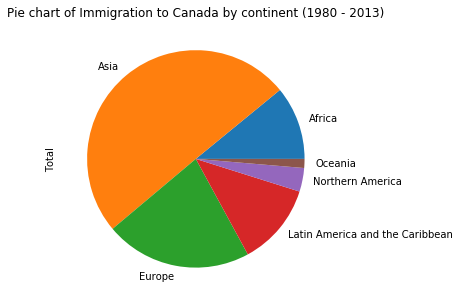

Continent
Africa     765660
Asia      3516953
Name: Total, dtype: int64

In [9]:
df_PieC = df_can.sort_values(['Total'], ascending = False, axis = 0)
df_PieC.set_index('Country', inplace=True)
df_PieC.columns = list(map(str, df_PieC.columns))

df_PieC = df_PieC.groupby('Continent', axis = 0).sum()

#Plot the data
df_PieC['Total'].plot(kind  = 'pie', figsize = (10,5) )
plt.title('Pie chart of Immigration to Canada by continent (1980 - 2013)')

plt.show()
df_PieC['Total'].head(2)


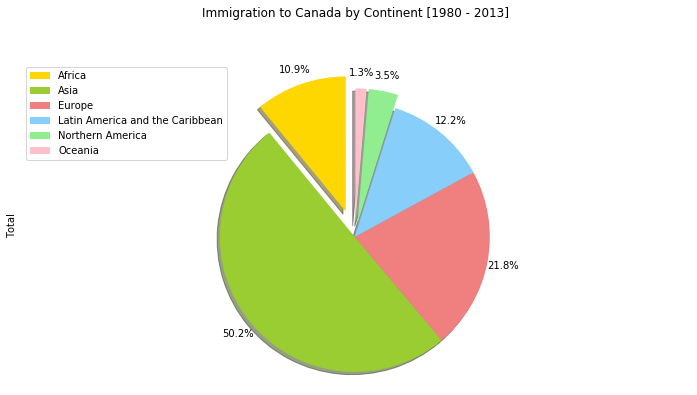

Continent
Africa     765660
Asia      3516953
Name: Total, dtype: int64

In [10]:
df_PieC = df_can.sort_values(['Total'], ascending = False, axis = 0)
df_PieC.set_index('Country', inplace=True)
df_PieC.columns = list(map(str, df_PieC.columns))

df_PieC = df_PieC.groupby('Continent', axis = 0).sum()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.2, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_PieC['Total'].plot(kind='pie',
                    figsize=(12, 6),
                    autopct='%1.1f%%', 
                    startangle=90,    
                    shadow=True,       
                    labels=None,         # turn off labels on pie chart
                    pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                    colors=colors_list,  # add custom colors
                    explode=explode_list # 'explode' lowest 3 continents
                    )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_PieC.index, loc='upper left') 

plt.show()
df_PieC['Total'].head(2)

# Box Plots <a id="8"></a>
A box plot is a way of statistically representing the distribution of given data through five main dimensions. The first dimension is minimum, which is the smallest number in the sorted data. The second dimension is first quartile, which is the point 25% of the way through the sorted data. In other words, a quarter of the datapoints are less than this value. The third dimension is median, which is the median of the sorted data. The fourth dimension is third quartile, which is the point 75% of the way through the sorted data. In other words, three-quarters of the data points are less than this value. And the final dimension is maximum, which is the highest number in the sorted data.

<img src="Boxplot.png" width = 400>

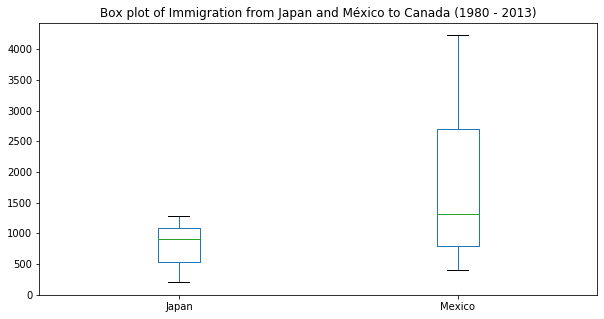

Country,Japan,Mexico
1980,701,409
1981,756,394


In [11]:
df_BoxP = df_can.sort_values(['Total'], ascending = False, axis = 0)
df_BoxP.set_index('Country', inplace=True)
df_BoxP.columns = list(map(str, df_BoxP.columns))

years = list(map(str, range(1980,2014)))
df_BoxP = df_BoxP.loc[['Japan', 'Mexico'], years].transpose()

#Plot the data
df_BoxP.plot(kind  = 'box', figsize = (10,5) )
plt.title('Box plot of Immigration from Japan and México to Canada (1980 - 2013)')

plt.show()
df_BoxP.head(2)

# Scatter Plots <a id="10"></a>
A scatter plot is a type of plot that displays values pertaining to typically two variables against each other. Usually it is a dependent variable to be plotted against an independent variable in order to determine if any correlation between the two variables exists.

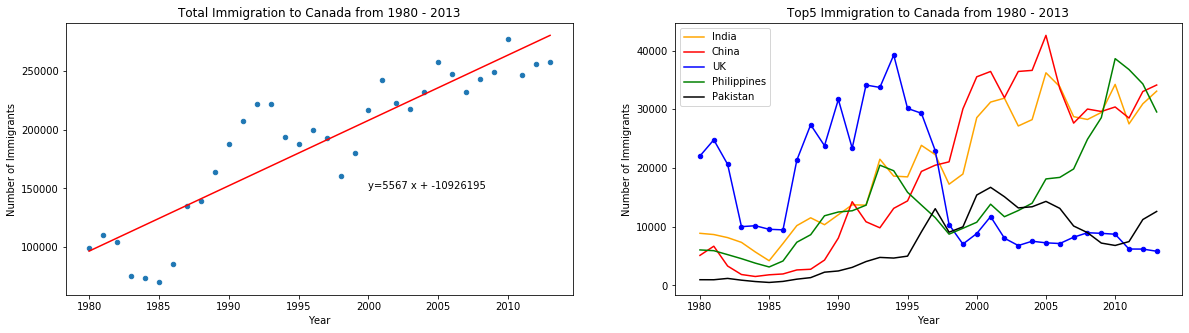

,years,India,China,UK,Philippines,Pakistan
0,1980,8880,5123,22045,6051,978
1,1981,8670,6682,24796,5921,972


In [12]:
#Setting the dataframe
years = list(map(int, range(1980,2014)))
df_ScatP = pd.DataFrame(df_can[years].sum(axis = 0))
df_ScatP.reset_index(inplace = True)
df_ScatP.columns = ['years', 'total']

df_ScatP2 = df_can.sort_values(['Total'], ascending = False, axis = 0).head()
df_ScatP2.set_index('Country', inplace=True)
df_ScatP2 = df_ScatP2[years].transpose()
df_ScatP2.reset_index(inplace = True)
df_ScatP2.columns = ['years', 'India', 'China', 'UK', 'Philippines', 'Pakistan']

#Create a model from the total emmigration
x = df_ScatP['years']      # year on x-axis
y = df_ScatP['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit


#Plotting the data
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

#Plotting first axis
df_ScatP.plot(kind = 'scatter',
             figsize = (20,5),
             x = 'years',
             y = 'total',
             ax = ax0)
ax0.set_title('Total Immigration to Canada from 1980 - 2013')
ax0.set_xlabel('Year')
ax0.set_ylabel('Number of Immigrants')

ax0.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
ax0.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

#Plotting second axis
df_ScatP2.plot(kind = 'line', figsize = (20,5), x = 'years', y = 'India', ax = ax1, color = 'orange')
df_ScatP2.plot(kind = 'line', figsize = (20,5), x = 'years', y = 'China', ax = ax1, color = 'red')
df_ScatP2.plot(kind = 'scatter', figsize = (20,5), x = 'years', y = 'UK', ax = ax1, color = 'blue')
df_ScatP2.plot(kind = 'line', figsize = (20,5), x = 'years', y = 'UK', ax = ax1, color = 'blue')
df_ScatP2.plot(kind = 'line', figsize = (20,5), x = 'years', y = 'Philippines', ax = ax1, color = 'green')
df_ScatP2.plot(kind = 'line', figsize = (20,5), x = 'years', y = 'Pakistan', ax = ax1, color = 'black')

ax1.set_title('Top5 Immigration to Canada from 1980 - 2013')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Immigrants')

plt.show()
df_ScatP.head(2)
df_ScatP2.head(2)

# Bubble Plots <a id="12"></a>
A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Marshall Islands,Palau,Monaco,Vanuatu,Andorra,New Caledonia,San Marino,Canada,Sao Tome and Principe,Western Sahara
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,0,1,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,0,0,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,0,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,0,0,0,0,0,0,0


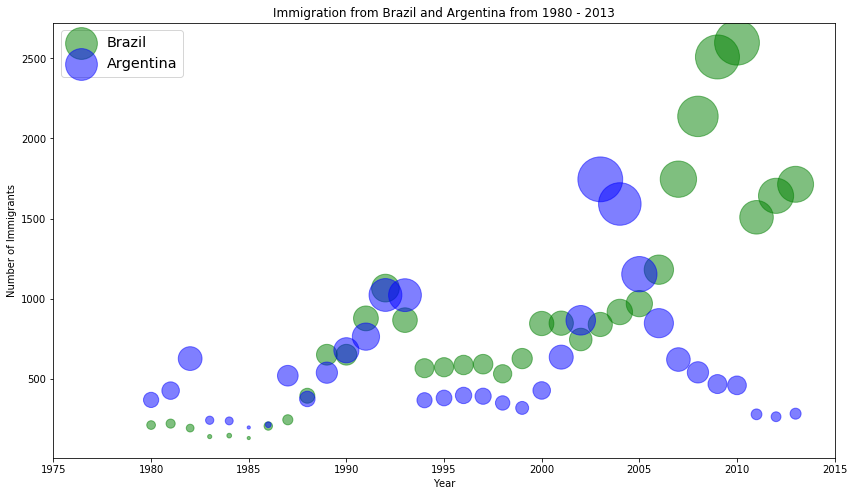

In [13]:
years = list(map(str, range(1980,2014)))
df_BubbleP = df_can.sort_values(['Total'], ascending = False, axis = 0)
df_BubbleP.set_index('Country', inplace=True)
df_BubbleP.columns = list(map(str, df_BubbleP.columns))
df_BubbleP = df_BubbleP[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_BubbleP.index = map(int, df_BubbleP.index)

# let's label the index. This will automatically be the column name when we reset the index
df_BubbleP.index.name = 'Year'

# reset index to bring the Year in as a column
df_BubbleP.reset_index(inplace=True)

norm_brazil = (df_BubbleP['Brazil'] - df_BubbleP['Brazil'].min()) / (df_BubbleP['Brazil'].max() - df_BubbleP['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_BubbleP['Argentina'] - df_BubbleP['Argentina'].min()) / (df_BubbleP['Argentina'].max() - df_BubbleP['Argentina'].min())

# Brazil
ax0 = df_BubbleP.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_BubbleP.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

# view the changes
df_BubbleP.head()

# Waffle Charts <a id="14"></a>


A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard

**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.
**Step 2.** The second step is defining the overall size of the `waffle` chart.
**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles.
**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it. 
**Step 5.** Map the `waffle` chart matrix into a visual.
**Step 6.** Prettify the chart. 
**Step 7.** Create a legend and add it to chart. 

In [14]:
from PIL import Image # converting images into arrays
import matplotlib.patches as mpatches # needed for waffle Charts
mpl.style.use('ggplot') # optional: for ggplot-like style

In [15]:
df_WaffleC = df_can.sort_values(['Total'], ascending = False, axis = 0)
df_WaffleC.set_index('Country', inplace=True)
df_WaffleC.columns = list(map(str, df_WaffleC.columns))
df_WaffleC = df_WaffleC.loc[['Denmark','Norway', 'Sweden' ]]
df_WaffleC.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,272,293,...,62,101,97,108,81,92,93,94,81,6634
Norway,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,116,77,...,57,53,73,66,75,46,49,53,59,5060
Sweden,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,281,308,...,205,139,193,165,167,159,134,140,140,8599


Total number of tiles is 400
Denmark: 131
Norway: 100
Sweden: 169


<Figure size 720x360 with 0 Axes>

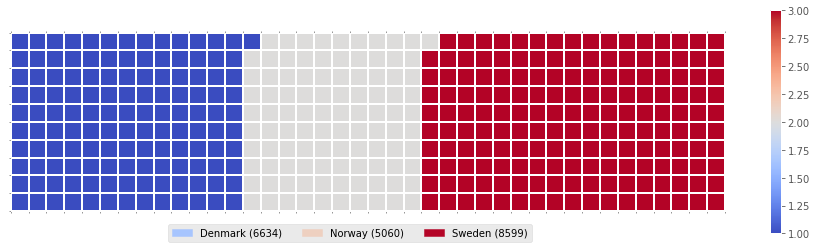

In [16]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles)) 
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    
width = 40 # width of chart
height = 10 # height of chart

categories = df_WaffleC.index.values # categories
values = df_WaffleC['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

# Word Clouds <a id="16"></a>

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud. 

Luckily, a Python package already exists in Python for generating `word` clouds. The package, called `word_cloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).

Let's use this package to learn how to generate a word cloud for a given text document.

In [17]:
# install wordcloud
pip install wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
  
print ('Wordcloud is installed and imported!')

SyntaxError: invalid syntax (<ipython-input-17-8943ad7e2ca0>, line 2)

In [ ]:
# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

In [ ]:
stopwords = set(STOPWORDS)

# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
stopwords.add('said')

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# download image
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plots <a id="18"></a>


> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html).


In lab Pie Charts, Box Plots, Scatter Plots, and Bubble Plots, we learned how to create a scatter plot and then fit a regression line. It took ~20 lines of code to create the scatter plot along with the regression fit. In this final section, we will explore seaborn and see how efficient it is to create regression lines and fits using this library!

In [18]:
import seaborn as sns

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


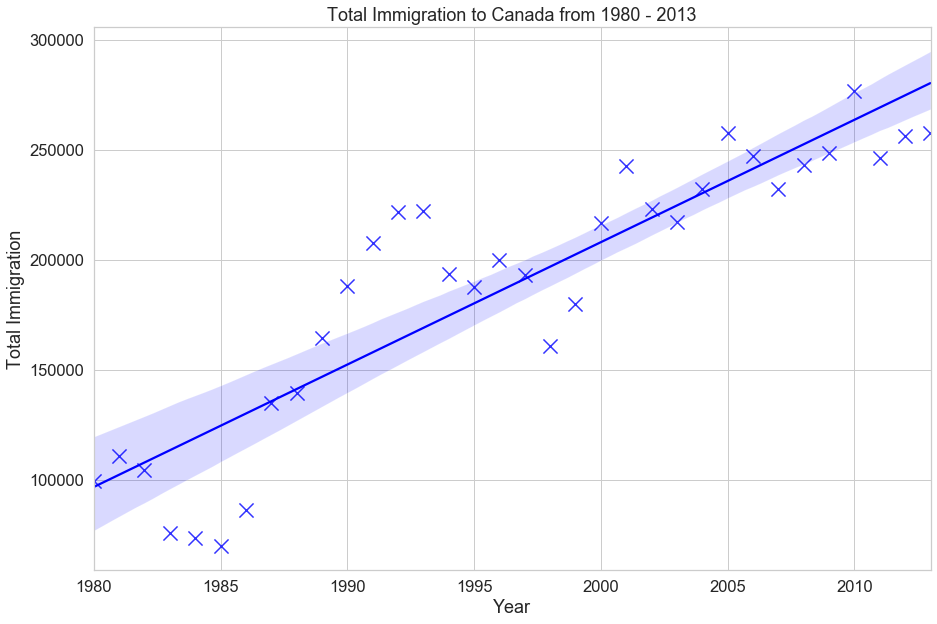

In [19]:
years = list(map(int, range(1980,2014)))
df_RegP = pd.DataFrame(df_can[years].sum(axis = 0))

# change the years to type float (useful for regression later on)
df_RegP.index = map(float, df_RegP.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_RegP.reset_index(inplace=True)

# rename columns
df_RegP.columns = ['year', 'total']

#Plotting Data
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_RegP, color = 'blue', marker = 'x', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

# view the final dataframe
df_RegP.head()

,year,Denmark,Norway,Sweden
0,1980.0,272,116,281
1,1981.0,293,77,308
2,1982.0,299,106,222
3,1983.0,106,51,176
4,1984.0,93,31,128


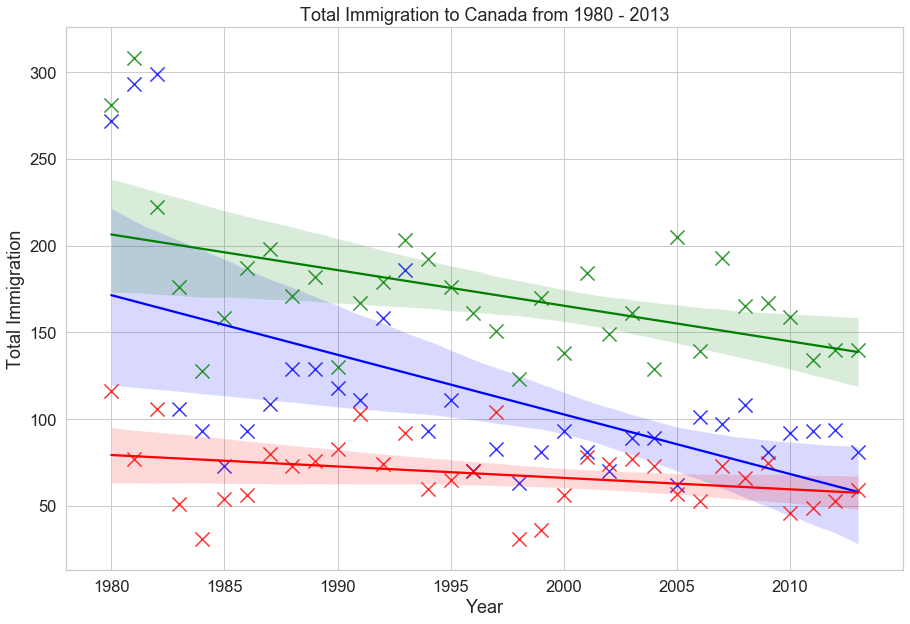

In [20]:

df_RegP = df_can.set_index('Country', inplace=False)

years = list(map(int,range(1980, 2014)))
df_RegP = df_RegP.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# change the years to type float (useful for regression later on)
df_RegP.index = map(float, df_RegP.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_RegP.reset_index(inplace=True)

# rename columns
df_RegP.columns = ['year', 'Denmark', 'Norway', 'Sweden']

#Plotting Data
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid') # change background to white background

ax = sns.regplot(x='year', y='Denmark', data=df_RegP, color = 'blue', marker = 'x', scatter_kws={'s': 200})
ax = sns.regplot(x='year', y='Norway', data=df_RegP, color = 'red', marker = 'x', scatter_kws={'s': 200})
ax = sns.regplot(x='year', y='Sweden', data=df_RegP, color = 'green', marker = 'x', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

# view the final dataframe
df_RegP.head()

# Geospatiala Data <a id="20"></a>

Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.
https://python-visualization.github.io/folium/quickstart.html

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

In [21]:
#!conda install -c conda-forge folium=0.5.0 --yes
#pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [22]:
# define the world map
plt.figure(figsize=(9, 6), dpi = 100)
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

<Figure size 900x600 with 0 Axes>

In [23]:
plt.figure(figsize=(9, 6), dpi = 100)
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display world map
world_map

<Figure size 900x600 with 0 Axes>

In [24]:
plt.figure(figsize=(9, 6), dpi = 100)
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Mapbox Bright')

# display world map
world_map

<Figure size 900x600 with 0 Axes>

In [25]:
plt.figure(figsize=(9, 6), dpi = 100)

mexico_latitude = 23.6345 
mexico_longitude = -102.5528
mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=5, tiles='Stamen Terrain')

# display world map
mexico_map

<Figure size 900x600 with 0 Axes>

In [26]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_incidents = df_incidents.iloc[0:100,:]
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [27]:
df_incidents.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168


In [28]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
 
for i in range(0,len(df_incidents)):
    folium.Marker([df_incidents.iloc[i]['Y'], df_incidents.iloc[i]['X']], popup=df_incidents.iloc[i]['IncidntNum']).add_to(sanfran_map)
sanfran_map

In [29]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
 
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True, 
            popup = label,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)
sanfran_map

In [30]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

# Choropleth Maps <a id="8"></a>

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area or it shows the level of variability within a region. Below is a `Choropleth` map of the US depicting the population by square mile per state.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/2000_census_population_density_map_by_state.png" width = 600> 

In [31]:
df_can.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,18433
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,2774
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,2749


In [32]:
# download countries geojson file
import wget
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json'
world_geo = wget.download(url)
#wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [33]:
#world_geo = r'world_countries.json'

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

C:\Users\JRodr\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
